In [ ]:
!pip install pmdarima

In [ ]:
!pip install -U kaleido
!pip install plotly --upgrade

## Bibliotecas e Funções Utilizadas

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from pmdarima.arima import auto_arima

### Funções de gráficos de comparação, gráficos de previsão

In [451]:
def mostrar_grafico(X, Y):

    fig = go.Figure(
        go.Scatter(x=X, y=Y)
    )

    fig.update_layout(height=600, width=800, title='Gráfico PIB per Capita', xaxis_title='Anos', yaxis_title='PIB per capita')
    fig.show()

    #fig.write_image(f"grafico-pib-percapita.png")

def grafico_comparar_markers(valores_reais, valores_previstos, anos):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=anos, y=valores_reais, mode='markers', name='Valores Reais de Teste'))
    fig.add_trace(go.Scatter(x=anos, y=valores_previstos, mode='markers', name='Valores previstos pelo machine learning'))

    fig.update_layout(height=600, width=800, title='Gráfico de comparação',
                      xaxis_title='Ano', yaxis_title='Valores')
    fig.show()

    #fig.write_image("grafico-comparacao-markers.png")

def grafico_previsao_linha(valores_reais, valores_previstos, anos_x, anos_prev):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=anos_x, y=valores_reais, mode='lines', name='Valores Originais'))
    fig.add_trace(go.Scatter(x=anos_prev, y=valores_previstos, mode='markers', name='Valor Previsto', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=[anos_x[-1], anos_prev[0]], y=[valores_reais[-1], valores_previstos[0]], mode='lines', showlegend=False, line=dict(color='green')))

    fig.update_layout(height=600, width=800, title='Gráfico de Previsão',
                      xaxis_title='Ano', yaxis_title='Valores')
    fig.show()

    #fig.write_image(f"grafico-previsao-linha.png")


def grafico_comparacao_linha(valores_reais, valores_previstos, anos_x, anos_prev):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=anos_x, y=valores_reais, mode='lines', name='Valores Reais'))
    fig.add_trace(go.Scatter(x=anos_prev, y=valores_previstos, mode='lines', name='Valores previstos pelo machine learning'))

    fig.update_layout(height=600, width=800, title='Gráfico de Comparação',
                      xaxis_title='Ano', yaxis_title='Valores')
    fig.show()

    #fig.write_image(f"grafico-comparacao-linha.png")

def grafico_previsao_linha_arima(anos_x, anos_prev, valor_prev):

    modelo_arima = auto_arima(valor_prev)

    fig = go.Figure(go.Scatter(
    x=anos_x.columns,
    y=valor_prev, name='Observed'

    ))

    fig.add_trace(go.Scatter(
        x=anos_x.columns,
        y = modelo_arima.predict_in_sample(),
        name='Predicted'
    ))

    fig.add_trace(go.Scatter(
        x=anos_prev.ravel(),
        y=modelo_arima.predict(len(anos_prev)), name='Forecast'))

    fig.update_layout(
        title=f'Previsão do PIB per capita para os próximos {len(anos_prev)} anos',
        yaxis_title='Valores PIB per capita',
        xaxis_title='Data')

    fig.show()

    fig.write_image(f"grafico-previsao-linha-arima.png")


### Lendo os dados

In [452]:
df_gdp_capita = pd.read_csv('/content/gdppercapita_us_inflation_adjusted.csv')

In [453]:
df_gdp_capita.head(15)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.3k,27.8k,27.6k,28.4k,28.9k,30.3k,31.7k,31.8k,25.8k,30.3k
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,596,608,603,592,590,589,579,584,553,426
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120,3150,3190,3100,2910,2810,2680,2570,2350,2300
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3740,3780,3860,3950,4090,4250,4430,4540,4410,4830
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.2k,37.6k,38.4k,38.9k,39.9k,39.3k,39.3k,39.4k,34.4k,36.8k
5,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.6k,38k,39.2k,41.5k,43.5k,43.4k,43.6k,43.8k,41.3k,42.5k
6,Argentina,7410,7690,7500,6990,7570,8240,8060,8190,8450,...,13.9k,14.1k,13.6k,13.8k,13.4k,13.6k,13.1k,12.7k,11.3k,12.4k
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3280,3400,3540,3670,3690,3990,4220,4560,4260,4520
8,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.2k,12.1k,12.5k,13.1k,13.1k,12.4k,13k,13.3k,14.3k,14.4k
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.2k,14k,14.4k,14.9k,15.6k,16k,17k,17.7k,14k,14.7k


In [454]:
df_gdp_capita.shape

(211, 63)

### Fazendo uma busca e filtrando os dados para que sejam da argentina

In [455]:
df_argentina = df_gdp_capita.loc[df_gdp_capita['country'] == 'Argentina']

In [456]:
df_argentina.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,Argentina,7410,7690,7500,6990,7570,8240,8060,8190,8450,...,13.9k,14.1k,13.6k,13.8k,13.4k,13.6k,13.1k,12.7k,11.3k,12.4k


### Deixando os dados prontos

E aqui faço todo um trabalho para apenas tratar os dados para aplicar machine learning, verificando todo tipo de empecilho que possa existir. é um conjunto de dados relativamente pequeno, ainda mais que filtrei para apenas argentina ficou pouquissímos dados. Mas, ainda sim dá para dar uma noção como o modelo irá se comportar.

### Verificando valor nulo

In [457]:
df_argentina.isnull().sum()

country    0
1960       0
1961       0
1962       0
1963       0
          ..
2017       0
2018       0
2019       0
2020       0
2021       0
Length: 63, dtype: int64

In [458]:
df_argentina = df_argentina.drop(columns='country')

In [459]:
df_gdp_capita.columns
df_gdp_capita_anos = df_gdp_capita.drop(columns='country')
df_gdp_capita_anos.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [460]:
d = {'anos': df_gdp_capita_anos.columns, 'pib_per_capita': df_argentina.iloc[0].tolist()}
argentina = pd.DataFrame(data=d)
argentina.pib_per_capita.values

array(['7410', '7690', '7500', '6990', '7570', '8240', '8060', '8190',
       '8450', '9130', '9260', '9630', '9630', '9740', '10.1k', '9940',
       '9580', '10.1k', '9480', '10.3k', '10.3k', '9590', '9370', '9620',
       '9620', '8990', '9400', '9510', '9260', '8470', '8140', '8760',
       '9330', '9960', '10.4k', '9970', '10.4k', '11.1k', '11.4k',
       '10.9k', '10.7k', '10.1k', '8900', '9580', '10.3k', '11.1k',
       '11.9k', '12.9k', '13.2k', '12.3k', '13.6k', '14.2k', '13.9k',
       '14.1k', '13.6k', '13.8k', '13.4k', '13.6k', '13.1k', '12.7k',
       '11.3k', '12.4k'], dtype=object)

In [461]:
argentina.head(2)

,anos,pib_per_capita
0,1960,7410
1,1961,7690


In [462]:
argentina.dtypes

anos              object
pib_per_capita    object
dtype: object

In [463]:
def convert_to_float(value):
    if 'k' in value:
        return float(value[:-1]) * 1000
    else:
        return float(value)

# Aplicar a função ao array usando list comprehension
argentina_pib_per_capita = np.array([convert_to_float(val) for val in argentina.pib_per_capita.values])

argentina_pib_per_capita.dtype

dtype('float64')

In [464]:
argentina['anos'] = argentina['anos'].astype(float)

# Gráfico de PIB per Capita da Argentina.

In [ ]:
mostrar_grafico(df_gdp_capita_anos.columns, argentina_pib_per_capita)

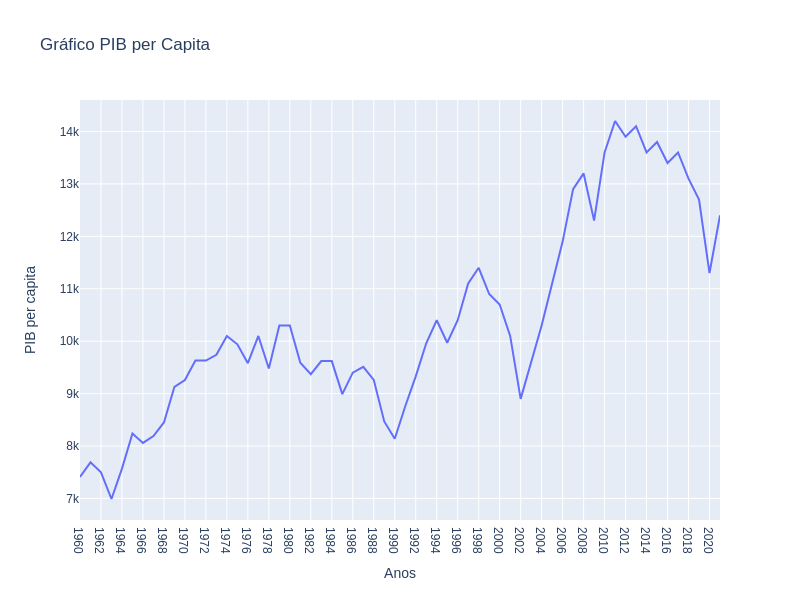

# Testando qual o melhor modelo para essa especifíca situação.

In [466]:
#Treinando o modelo

x=argentina['anos'].values.reshape(-1, 1)
y=argentina_pib_per_capita

SEED = 42
np.random.randint(SEED)

linear_model = LinearRegression(fit_intercept=True)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.20, random_state=SEED)

linear_model.fit(treino_x, treino_y)
previsoes = linear_model.predict(teste_x)

# Calcula o coeficiente de determinação R2
r2 = r2_score(teste_y, previsoes)
print("R-squared: %.2f" % r2)

# Calcula o erro médio quadrático (MSE)
mse = mean_squared_error(teste_y, previsoes)
print("Mean Squared Error (MSE): %.2f" % mse)


R-squared: 0.79
Mean Squared Error (MSE): 1160585.47


In [467]:
# Grau do polinômio
grau_polinomio = 2

x=argentina['anos'].values.reshape(-1, 1)
y=argentina_pib_per_capita

poly = PolynomialFeatures(degree=grau_polinomio)
x = poly.fit_transform(x)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.20, random_state=SEED)

modelo_polinomial = LinearRegression()
modelo_polinomial.fit(treino_x, treino_y)

previsoes_polinomiais = modelo_polinomial.predict(teste_x)

r2_polinomial = r2_score(teste_y, previsoes_polinomiais)
mse_polinomial = mean_squared_error(teste_y, previsoes_polinomiais)

print("Regressão Polinomial")
print("R-squared: %.2f" % r2_polinomial)
print("Mean Squared Error (MSE): %.2f" % mse_polinomial)

Regressão Polinomial
R-squared: 0.81
Mean Squared Error (MSE): 1011571.39


In [468]:
x=argentina['anos'].values.reshape(-1, 1)
y=argentina_pib_per_capita

modelo_svm = SVR(kernel='linear')

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.20, random_state=SEED)

modelo_svm.fit(treino_x, treino_y)

previsoes_svm = modelo_svm.predict(teste_x)

r2_svm = r2_score(teste_y, previsoes_svm)
mse_svm = mean_squared_error(teste_y, previsoes_svm)

print("Máquinas de Vetores de Suporte (SVM)")
print("R-squared: %.2f" % r2_svm)
print("Mean Squared Error (MSE): %.2f" % mse_svm)

Máquinas de Vetores de Suporte (SVM)
R-squared: 0.72
Mean Squared Error (MSE): 1535523.02


In [469]:
x=argentina['anos'].values.reshape(-1, 1)
y=argentina_pib_per_capita

modelo_arvore = DecisionTreeRegressor(random_state=SEED, max_depth=50)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.10, random_state=SEED)

modelo_arvore.fit(treino_x, treino_y)

previsoes_arvore = modelo_arvore.predict(teste_x)

r2_arvore = r2_score(teste_y, previsoes_arvore)
mse_arvore = mean_squared_error(teste_y, previsoes_arvore)

print("Árvores de Decisão")
print("R-squared: %.2f" % r2_arvore)
print("Mean Squared Error (MSE): %.2f" % mse_arvore)


Árvores de Decisão
R-squared: 0.94
Mean Squared Error (MSE): 406700.00


In [470]:
x=argentina['anos'].values.reshape(-1, 1)
y=argentina_pib_per_capita

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.20, random_state=SEED)

teste_x_rf = teste_x

# Criação do modelo de Random Forest
modelo_rf = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=SEED)

modelo_rf.fit(treino_x, treino_y)

previsoes_rf = modelo_rf.predict(teste_x)

r2_rf = r2_score(teste_y, previsoes_rf)
mse_rf = mean_squared_error(teste_y, previsoes_rf)

# Aqui só estou garantindo que estou realmente pegando as variáveis corretas.

teste_y_rf = teste_y

print("R-squared: %.2f" % r2_rf)
print("Mean Squared Error (MSE): %.2f" % mse_rf)


R-squared: 0.94
Mean Squared Error (MSE): 333543.32


Melhor modelo acaba sendo o RandomForestRegressor pelos resultados, o Decision Tree também tem um resultado ótimo, então, melhor é ver visualmente os dois

In [471]:
previsoes_rf

array([13068. , 13686. ,  7575. , 13336. ,  7689.7, 12137. ,  9981.4,
        9631.4,  9541.3, 12534. ,  8643.8,  8632.6, 11696.8])

In [472]:
teste_y_rf

array([13600., 13400.,  7410., 13600.,  8240., 13200.,  9580.,  9630.,
        8990., 12700.,  8140.,  9130., 12900.])

In [473]:
teste_x_rf.sort()

# Gráfico de comparação de Valores Reais x Valores Previstos pelo Machine Learning do PIB per capita da Argentina.

In [ ]:
grafico_comparar_markers(anos=teste_x_rf.ravel(), valores_reais=teste_y_rf, valores_previstos=previsoes_rf)

Utilizando Random Forest Regressor para ver o quão acertivo é esse modelo

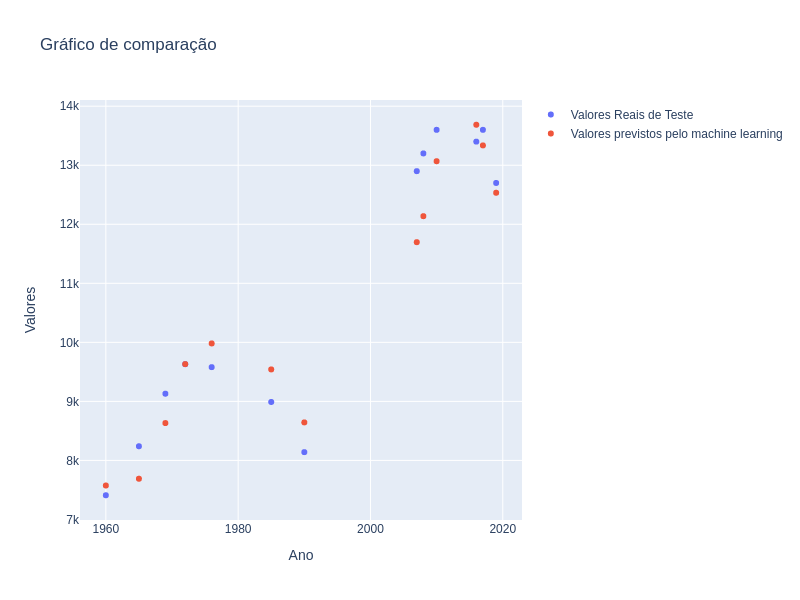

In [475]:
valores_prever_tudo = np.array(df_gdp_capita_anos.loc[:, '1960':].columns)
valores_prever_tudo = valores_prever_tudo.reshape(-1, 1)

Aqui faço uma comparação de toda a linha do tempo, para visualizar isso de uma maneira geral

In [ ]:
#Modelo Decision Tree Regressor

grafico_comparacao_linha(anos_x=df_gdp_capita_anos.loc[:, '1960':].columns, anos_prev=df_gdp_capita_anos.loc[:, '1960':].columns,
                 valores_reais=argentina_pib_per_capita, valores_previstos=modelo_arvore.predict(valores_prever_tudo))

# Gráfico de Comparação de toda a linha do Tempo

#### Decision Tree Regressor:

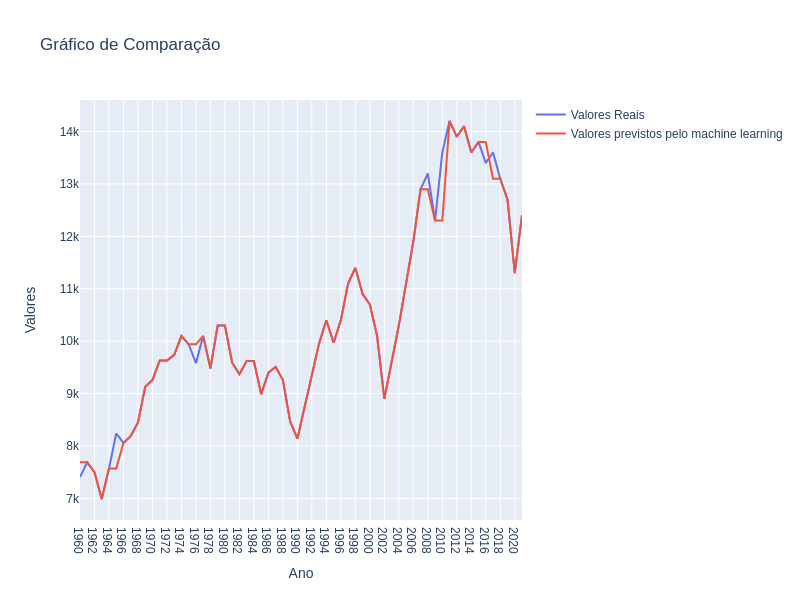

In [ ]:
#Modelo Random Forest Regressor

grafico_comparacao_linha(anos_x=df_gdp_capita_anos.loc[:, '1960':].columns, anos_prev=df_gdp_capita_anos.loc[:, '1960':].columns,
                 valores_reais=argentina_pib_per_capita, valores_previstos=modelo_rf.predict(valores_prever_tudo))

#### Random Forest Regressor:

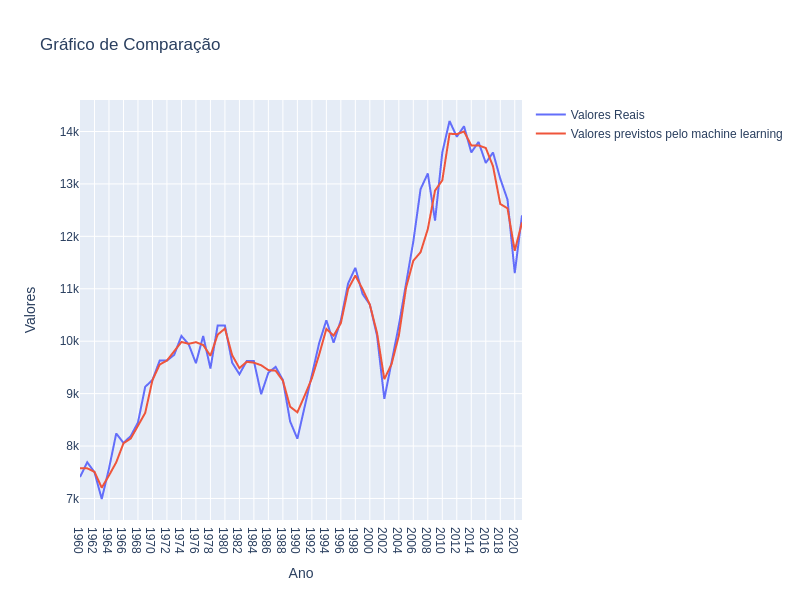

### Filtrando para a região do Brasil

In [ ]:
brasil = df_gdp_capita.loc[df_gdp_capita['country'] == 'Brazil']
brasil = brasil.drop(columns='country')
brasil.isnull().sum()

In [479]:
d = {'anos': df_gdp_capita_anos.columns, 'pib_per_capita': brasil.iloc[0].tolist()}
brasil = pd.DataFrame(data=d)
brasil.pib_per_capita.values
brasil_pib_per_capita = np.array([convert_to_float(val) for val in brasil.pib_per_capita.values])

# Gráfico de PIB per Capita do Brasil

In [ ]:
mostrar_grafico(df_gdp_capita_anos.columns, brasil_pib_per_capita)

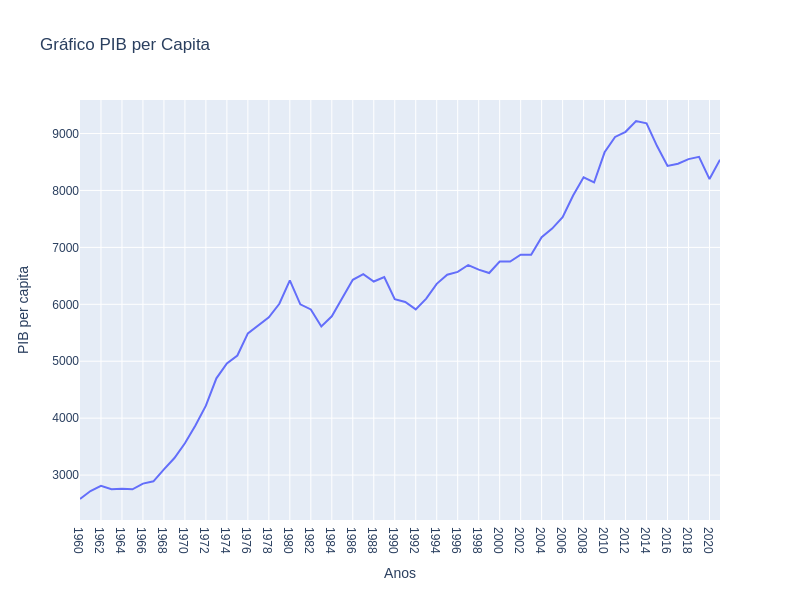

### Treinando o modelo para a região do Brasil

In [481]:
modelo_rf = RandomForestRegressor(random_state=SEED)

x=brasil['anos'].values.reshape(-1, 1)
y=brasil_pib_per_capita

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

teste_x_rf = teste_x

modelo_rf.fit(treino_x, treino_y)

previsoes_rf = modelo_rf.predict(teste_x)

r2_rf = r2_score(teste_y, previsoes_rf)
mse_rf = mean_squared_error(teste_y, previsoes_rf)

# Aqui só estou garantindo que estou realmente pegando as variáveis corretas.

teste_y_rf = teste_y

print("Random Forest")
print("R-squared: %.2f" % r2_rf)
print("Mean Squared Error (MSE): %.2f" % mse_rf)


Random Forest
R-squared: 0.99
Mean Squared Error (MSE): 43549.03


In [482]:
x=brasil['anos'].values.reshape(-1, 1)
y=brasil_pib_per_capita

modelo_arvore = DecisionTreeRegressor(random_state=SEED, max_depth=50)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

modelo_arvore.fit(treino_x, treino_y)

previsoes_arvore = modelo_arvore.predict(teste_x)

r2_arvore = r2_score(teste_y, previsoes_arvore)
mse_arvore = mean_squared_error(teste_y, previsoes_arvore)

print("Árvores de Decisão")
print("R-squared: %.2f" % r2_arvore)
print("Mean Squared Error (MSE): %.2f" % mse_arvore)


Árvores de Decisão
R-squared: 0.99
Mean Squared Error (MSE): 68778.95


# Gráfico de comparação de Valores Reais x Valores Previstos pelo Machine Learning do PIB do Brasil.

In [ ]:
#Modelo Decision Tree Regressor

grafico_comparacao_linha(anos_x=df_gdp_capita_anos.loc[:, '1960':].columns, anos_prev=df_gdp_capita_anos.loc[:, '1960':].columns,
                 valores_reais=brasil_pib_per_capita, valores_previstos=modelo_arvore.predict(valores_prever_tudo))

#### Decision Tree Regressor:

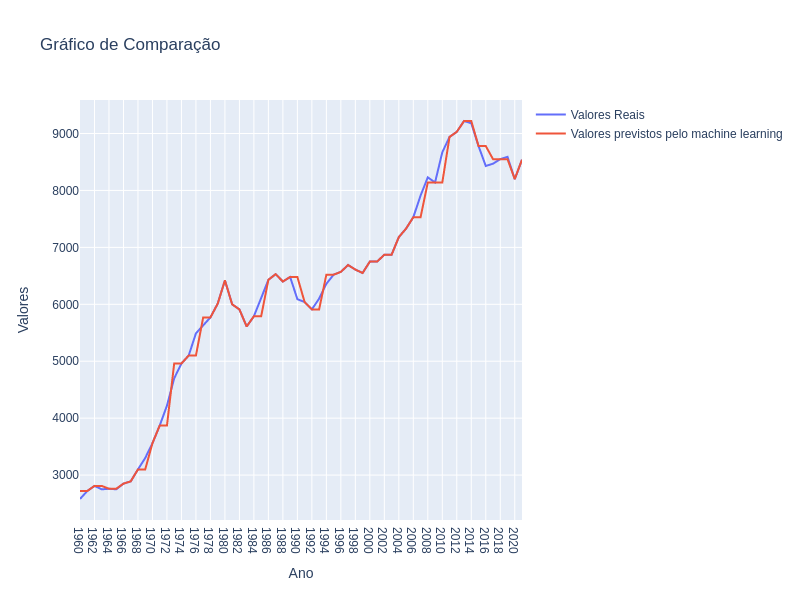

In [ ]:
#Modelo Random Forest Regressor

grafico_comparacao_linha(anos_x=df_gdp_capita_anos.loc[:, '1960':].columns, anos_prev=df_gdp_capita_anos.loc[:, '1960':].columns,
                 valores_reais=brasil_pib_per_capita, valores_previstos=modelo_rf.predict(valores_prever_tudo))

#### Random Forest Regressor:

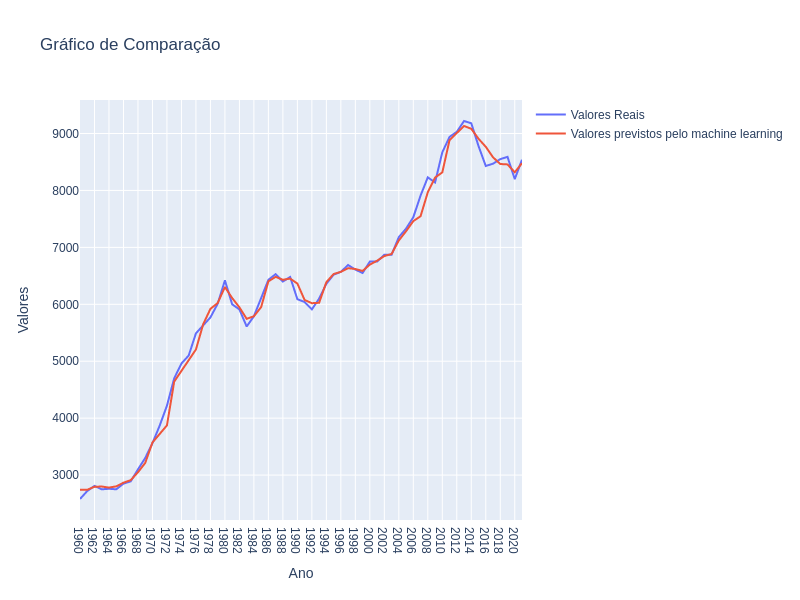

In [485]:
valores_prever = np.array([2022.]).reshape(-1, 1)

# Gráfico de previsão do PIB per capita do Brasil para o ano de 2022

In [ ]:
grafico_previsao_linha(anos_x=df_gdp_capita_anos.loc[:, '2005':].columns, anos_prev=valores_prever.ravel(),
                 valores_reais=brasil_pib_per_capita[45:], valores_previstos=modelo_arvore.predict(valores_prever))

Para realizar essa previsão utilizei o **Decision Tree Regressor**, tive um problema em realizar previsões para anos posteriores ao de 2022, pensei em uma alternativa, e, alternativa que enxerguei foi utilizar o **auto arima**.

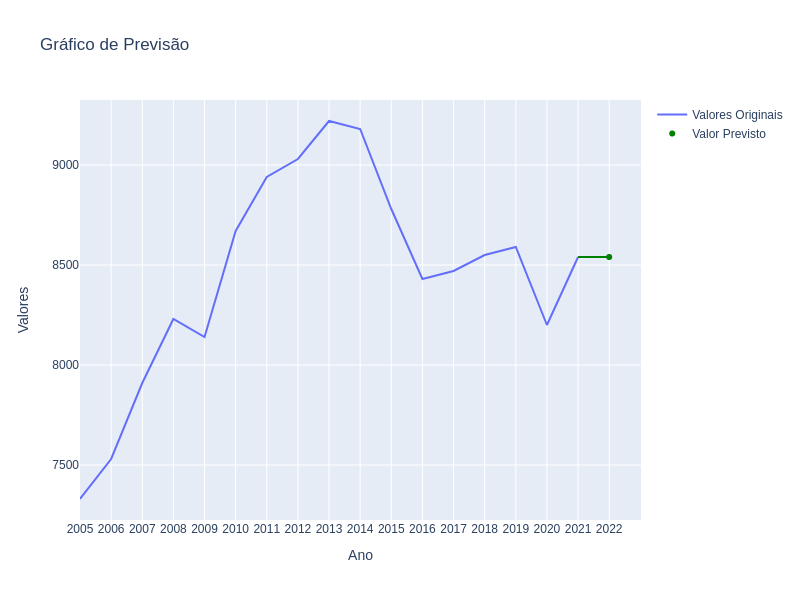

In [487]:
valores_prever = np.array([2022., 2023., 2024.]).reshape(-1, 1)

# Gráfico de Previsão do PIB per Capita do Brasil para os próximos 3 anos utilizando o Auto Arima

In [ ]:
grafico_previsao_linha_arima(anos_x=df_gdp_capita_anos.loc[:, '1960':], anos_prev=valores_prever,
                             valor_prev=brasil_pib_per_capita,)

Aqui utilizei o **auto arima**, fiquei satisfeito com o resultado previsto.

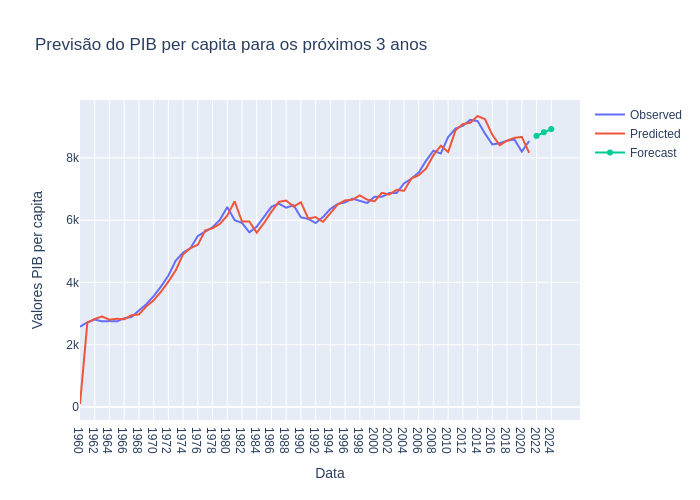